<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/big%20data/modin/lab_7_modin_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: Modin Scikit-learn

In [ ]:
!pip install modin[all] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 970 kB 4.1 MB/s 
     |████████████████████████████████| 12.2 MB 57.3 MB/s 
     |████████████████████████████████| 68 kB 6.8 MB/s 
     |████████████████████████████████| 57.4 MB 1.2 MB/s 
     |████████████████████████████████| 132 kB 54.0 MB/s 
     |████████████████████████████████| 1.8 MB 58.8 MB/s 
     |████████████████████████████████| 102 kB 54.9 MB/s 
     |████████████████████████████████| 117 kB 48.7 MB/s 
     |████████████████████████████████| 439 kB 56.4 MB/s 
     |████████████████████████████████| 1.6 MB 44.4 MB/s 
     |████████████████████████████████| 121 kB 46.9 MB/s 
     |████████████████████████████████| 9.8 MB 58.0 MB/s 
     |████████████████████████████████| 423 kB 37.2 MB/s 
     |████████████████████████████████| 360 kB 65.4 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |█████████████████████████████

In [ ]:
%matplotlib inline

import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/modin-project/modin/master/examples/data/boston_housing.csv")

data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
features = data.drop("PRICE", axis=1)
labels = data["PRICE"]

type(features)

modin.pandas.dataframe.DataFrame

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, labels)

LinearRegression()

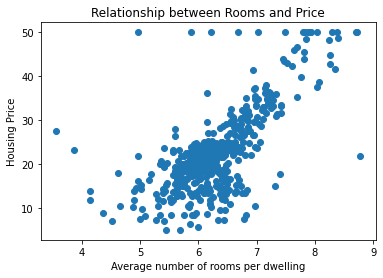

In [ ]:
plt.scatter(data["RM"], labels)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between Rooms and Price")
plt.show()

In [ ]:
predicted_prices = lm.predict(features)

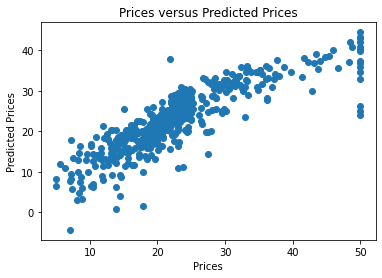

In [ ]:
plt.scatter(labels, predicted_prices)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices versus Predicted Prices")
plt.show()

In [ ]:
training_error = \
    (labels - predicted_prices).apply(lambda x: x ** 2).mean()

training_error

21.831934375295628

In [ ]:
# Citation: http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/